# Project 8: Machine Learning for Predictive Analytics

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_csv("S:\AINE AI\Telecom Data - Machine Learning\Telecom Data.csv")

## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
print("Data frame has %d number of rows and %d number of columns\n" %(cust_df.shape[0], cust_df.shape[1]))
print("*"*120)

# data type of column 
print("Data tpye of column")
cust_df.info()
print("*"*120)

# descriptive statistics of data
print("Descriptive statistics\n")
cust_df.describe()



Data frame has 51047 number of rows and 58 number of columns

************************************************************************************************************************
Data tpye of column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCall

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [4]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
print("Number of customer who has zero monthly revenue",cust_df.MonthlyRevenue.isna().sum())

cust_df.MonthlyRevenue.dropna(axis= 0, how = 'any', inplace = True)

Number of customer who has zero monthly revenue 156


### Q1.2 How many columns has missing values percentage > 5%

In [5]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?
cust_df.isna().sum()*(100/len(cust_df))




CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.305601
MonthlyMinutes               0.305601
TotalRecurringCharge         0.305601
DirectorAssistedCalls        0.305601
OverageMinutes               0.305601
RoamingCalls                 0.305601
PercChangeMinutes            0.718945
PercChangeRevenues           0.718945
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

<mark>__Result:__
    
In the given dataset, their is no need to impute missing values because data size is quite large and missing value percentage in any column is less than five percent. 

In [6]:
cust_df = cust_df.dropna(how='any')
cust_df.isna().sum()*(100/len(cust_df))

CustomerID                   0.0
Churn                        0.0
MonthlyRevenue               0.0
MonthlyMinutes               0.0
TotalRecurringCharge         0.0
DirectorAssistedCalls        0.0
OverageMinutes               0.0
RoamingCalls                 0.0
PercChangeMinutes            0.0
PercChangeRevenues           0.0
DroppedCalls                 0.0
BlockedCalls                 0.0
UnansweredCalls              0.0
CustomerCareCalls            0.0
ThreewayCalls                0.0
ReceivedCalls                0.0
OutboundCalls                0.0
InboundCalls                 0.0
PeakCallsInOut               0.0
OffPeakCallsInOut            0.0
DroppedBlockedCalls          0.0
CallForwardingCalls          0.0
CallWaitingCalls             0.0
MonthsInService              0.0
UniqueSubs                   0.0
ActiveSubs                   0.0
ServiceArea                  0.0
Handsets                     0.0
HandsetModels                0.0
CurrentEquipmentDays         0.0
AgeHH1    

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

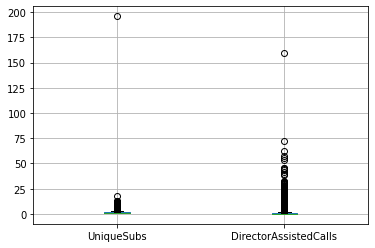

In [7]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [8]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
qValue = [i/100 for i in range(95,101,1)] 
cust_df[cols].quantile(qValue)

,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.45
0.98,4.0,6.93
0.99,5.0,9.65
1.00,196.0,159.39


## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='MonthlyMinutes'>

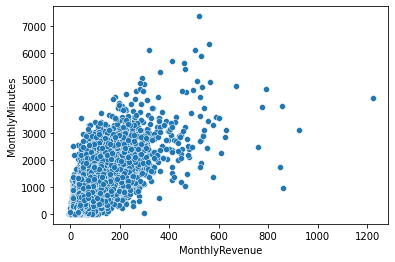

In [9]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'MonthlyMinutes', data = cust_df )

<mark>__Result:__
    
From the graph it is clear that with increasing monthly revenue, monthly minutes are also increasing.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

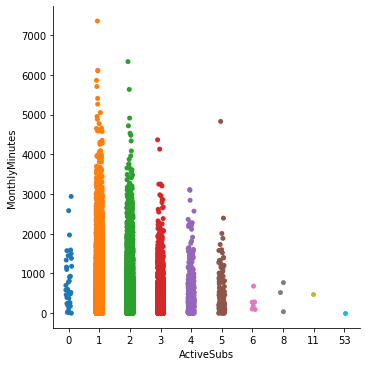

In [10]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x='ActiveSubs', y = 'MonthlyMinutes', data = cust_df) 

<mark>__Result:__
    
From the graph it is clearly evident that with increasing active subscriber monthly minutes is decreasing. It is maximum when active subscriber is 1. 

### Q2.3 Does credit rating have an impact in churn rate?

<AxesSubplot:xlabel='Churn', ylabel='count'>

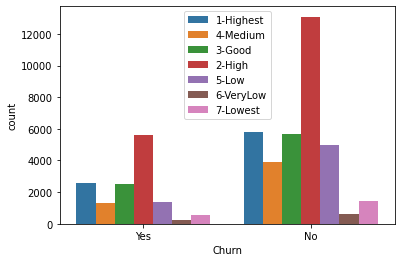

In [11]:
sns.countplot(x='Churn',hue='CreditRating',data=cust_df)
plt.legend(loc='upper center')
plt.show()

<mark>__Result:__
    
When the credit rating is low then churn is there but when customer rating is high then churn is not their. 

## Q3. Create additional features to help predict churn

In [12]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge']/ cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_average_minutes']=cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    
    #3.4 Percent of blocked call over total montly minutes
    cust_df['perc_bloced_call'] = cust_df['BlockedCalls'] / cust_df['MonthlyMinutes']
    
    #3.5 Pecent of unique handset model over total model
    cust_df['perc_unique_handset'] = cust_df['HandsetModels'] / cust_df['Handsets']
    
    
    return cust_df  


In [35]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)

# cust_df['Churn'].dtype.name
cust_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49752 entries, 0 to 51043
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  int64  
 1   Churn                      49752 non-null  object 
 2   MonthlyRevenue             49752 non-null  float64
 3   MonthlyMinutes             49752 non-null  float64
 4   TotalRecurringCharge       49752 non-null  float64
 5   DirectorAssistedCalls      49752 non-null  float64
 6   OverageMinutes             49752 non-null  float64
 7   RoamingCalls               49752 non-null  float64
 8   PercChangeMinutes          49752 non-null  float64
 9   PercChangeRevenues         49752 non-null  float64
 10  DroppedCalls               49752 non-null  float64
 11  BlockedCalls               49752 non-null  float64
 12  UnansweredCalls            49752 non-null  float64
 13  CustomerCareCalls          49752 non-null  flo

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [36]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
# freture = ["MonthlyRevenue", "MonthlyMinutes", "TotalRecurringCharge", "perc_active_subs","perc_average_minutes", "MonthsInService"] 
# X = cust_df[freture]
# y = cust_df['Churn']
X=cust_df.drop(columns=['Churn', 'ServiceArea',"CustomerID"])
y=cust_df['Churn']
# scalar=StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Create dummy variables for all categorical variables
X = pd.get_dummies(X)
y = pd.get_dummies(y)
# X.info()


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [37]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression

Logistic_Regression = LogisticRegression() 

Logistic_Regression.fit(X_train, y_train )


ValueError: could not convert string to float: 'Yes'

In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model


#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)



#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix




### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [ ]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set





In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model


#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)



#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix



<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?

### Q4.3 Identify most important features impacting churn

In [ ]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

pd.Series(model.feature_importances_, index=X_train.columns)

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [ ]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object



## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [ ]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)







<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   